In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
import numpy as np
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn import datasets, manifold
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import KernelPCA

#CARGAR LOS DATOS
df = pd.read_csv('datasetMedico.csv')

sr_color= df.iloc[:, 784]
sr_points= df.iloc[:, 0:783]
print(sr_color)


k = 8
# Definir etiquetas para las clases
clase = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF','VASC']

points = sr_points.copy()
color = sr_color.copy()


0      0
1      0
2      0
3      1
4      1
      ..
815    6
816    6
817    6
818    6
819    6
Name: class, Length: 820, dtype: int64


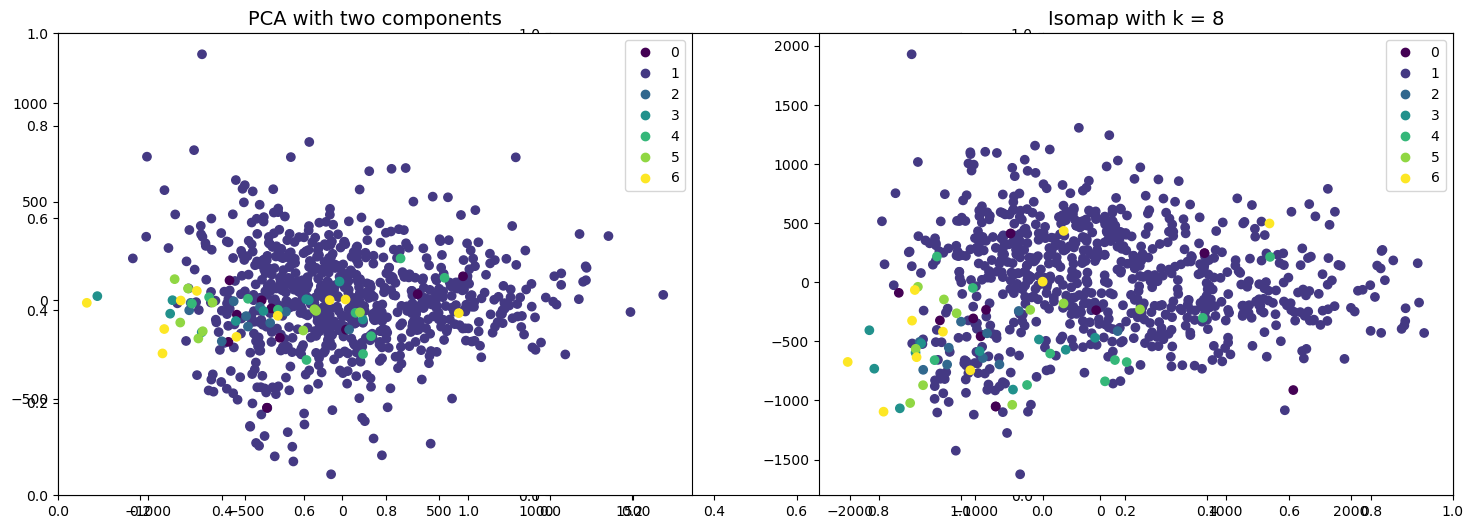

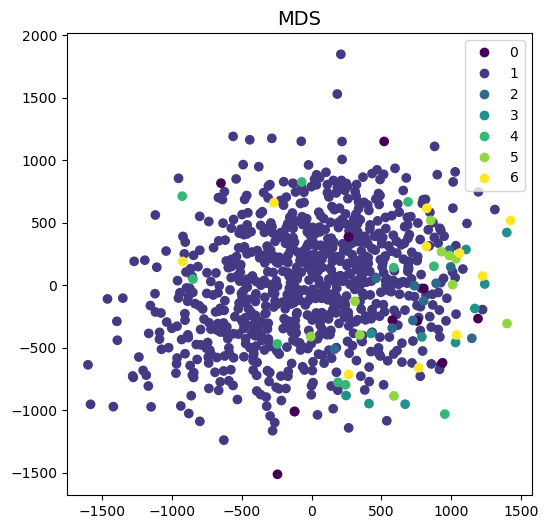

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#PCA
pca = PCA(n_components=2)
pca.fit(points)
X_pca = pca.transform(points)
ax = fig.add_subplot(1, 2, 1)
scatter= ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color,label=clase)
ax.legend(*scatter.legend_elements())
ax.set_title('PCA with two components', size=14)

#ISOMAP
model = Isomap(n_components=2, n_neighbors=k)
X_iso = model.fit_transform(points)
ax = fig.add_subplot(1, 2, 2)
scatter=ax.scatter(X_iso[:, 0], X_iso[:, 1], c=color,label=clase)
ax.legend(*scatter.legend_elements())
ax.set_title('Isomap with k = ' + str(k), size=14)

#MDS
points = sr_points.copy()
color = sr_color.copy()
mds = MDS()
X = mds.fit_transform(points)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
scatter= ax.scatter(X[:, 0], X[:, 1], c=color,label=clase)
ax.legend(*scatter.legend_elements())
ax.set_title('MDS', size=14)
plt.show()
plt.close()
